<a href="https://colab.research.google.com/github/SDGPTeamX/PregRed/blob/feature%2Fprediction-model/ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import os
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split


In [40]:
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.4.1


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [43]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [44]:
all_ds =pd.read_csv('/content/drive/MyDrive/MachineLearndataset--30-1-2021/Weka_PregRed_Selected13_Dataset.csv')
all_ds

,'Blood Sugar',Haemoglobin,Subfertility=Yes,Height,Age,BMI,'Cardiac Diseases=Yes',Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes','Thyroid Diseases=Yes','Blood Pressure',Output
0,0.898990,0.648649,0,0.414141,0.50000,0.439344,0,0.333333,0,0,0,0,0.000000,Yes
1,0.277778,0.540541,0,0.616162,0.00000,0.408248,0,0.000000,0,1,0,0,0.000000,Yes
2,0.444444,0.378378,0,0.494949,0.31250,0.272131,0,0.166667,0,1,1,0,0.000000,Yes
3,0.496608,0.591225,0,0.494949,0.62500,0.275410,0,0.166667,0,1,1,0,0.666667,No
4,0.444444,0.337838,0,0.474747,0.50000,0.275410,0,0.166667,0,1,1,0,0.000000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0.525253,0.635135,1,0.656566,0.25000,0.432787,0,0.000000,0,1,1,0,0.000000,No
1994,0.545455,0.648649,0,0.565657,0.28125,0.400000,0,0.000000,0,1,0,0,0.000000,No
1995,0.444444,0.567568,0,0.434343,0.59375,0.445902,0,0.166667,0,1,1,0,0.000000,No
1996,0.555556,0.756757,0,0.525253,0.37500,0.439344,0,0.166667,0,1,1,0,0.000000,No


In [45]:
all_ds ['Prediction'] =all_ds.Output.map({'Yes':1,'No':0})
all_ds.drop('Output',
  axis='columns', inplace=True)
all_ds


,'Blood Sugar',Haemoglobin,Subfertility=Yes,Height,Age,BMI,'Cardiac Diseases=Yes',Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes','Thyroid Diseases=Yes','Blood Pressure',Prediction
0,0.898990,0.648649,0,0.414141,0.50000,0.439344,0,0.333333,0,0,0,0,0.000000,1
1,0.277778,0.540541,0,0.616162,0.00000,0.408248,0,0.000000,0,1,0,0,0.000000,1
2,0.444444,0.378378,0,0.494949,0.31250,0.272131,0,0.166667,0,1,1,0,0.000000,1
3,0.496608,0.591225,0,0.494949,0.62500,0.275410,0,0.166667,0,1,1,0,0.666667,0
4,0.444444,0.337838,0,0.474747,0.50000,0.275410,0,0.166667,0,1,1,0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0.525253,0.635135,1,0.656566,0.25000,0.432787,0,0.000000,0,1,1,0,0.000000,0
1994,0.545455,0.648649,0,0.565657,0.28125,0.400000,0,0.000000,0,1,0,0,0.000000,0
1995,0.444444,0.567568,0,0.434343,0.59375,0.445902,0,0.166667,0,1,1,0,0.000000,0
1996,0.555556,0.756757,0,0.525253,0.37500,0.439344,0,0.166667,0,1,1,0,0.000000,0


In [46]:
print(f'Number of rows/examples and columns in the dataset :{all_ds.shape}')

Number of rows/examples and columns in the dataset :(1998, 14)


In [47]:
all_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   'Blood Sugar'               1998 non-null   float64
 1   Haemoglobin                 1998 non-null   float64
 2   Subfertility=Yes            1998 non-null   int64  
 3   Height                      1998 non-null   float64
 4   Age                         1998 non-null   float64
 5   BMI                         1998 non-null   float64
 6   'Cardiac Diseases=Yes'      1998 non-null   int64  
 7   Gravidity                   1998 non-null   float64
 8   Consanguinity=Yes           1998 non-null   int64  
 9   'Rubella Immunization=Yes'  1998 non-null   int64  
 10  'Had Folic Acid=Yes'        1998 non-null   int64  
 11  'Thyroid Diseases=Yes'      1998 non-null   int64  
 12  'Blood Pressure'            1998 non-null   float64
 13  Prediction                  1998 

In [48]:
print("Display NA values in each columns:")
all_ds.isna().sum(axis=0)

Display NA values in each columns:


'Blood Sugar'                 0
Haemoglobin                   0
Subfertility=Yes              0
Height                        0
Age                           0
BMI                           0
'Cardiac Diseases=Yes'        0
Gravidity                     0
Consanguinity=Yes             0
'Rubella Immunization=Yes'    0
'Had Folic Acid=Yes'          0
'Thyroid Diseases=Yes'        0
'Blood Pressure'              0
Prediction                    0
dtype: int64

In [49]:
n=20
temp_ds = all_ds[:n]
temp_ds.shape

(20, 14)

In [50]:
all_ds = all_ds.sample(frac=0.7)

In [51]:
train_dataset, temp_test_dataset = train_test_split(all_ds, test_size=0.3)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(979, 14)
(420, 14)


In [52]:
test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(210, 14)
(210, 14)


In [53]:
print(f"Display the datatype of the test_dataset : {type(test_dataset)}")
print(f"Train dataset : {train_dataset.shape}")
print(f"Test dataset : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")


Display the datatype of the test_dataset : <class 'pandas.core.frame.DataFrame'>
Train dataset : (979, 14)
Test dataset : (210, 14)
Validation dataset : (210, 14)


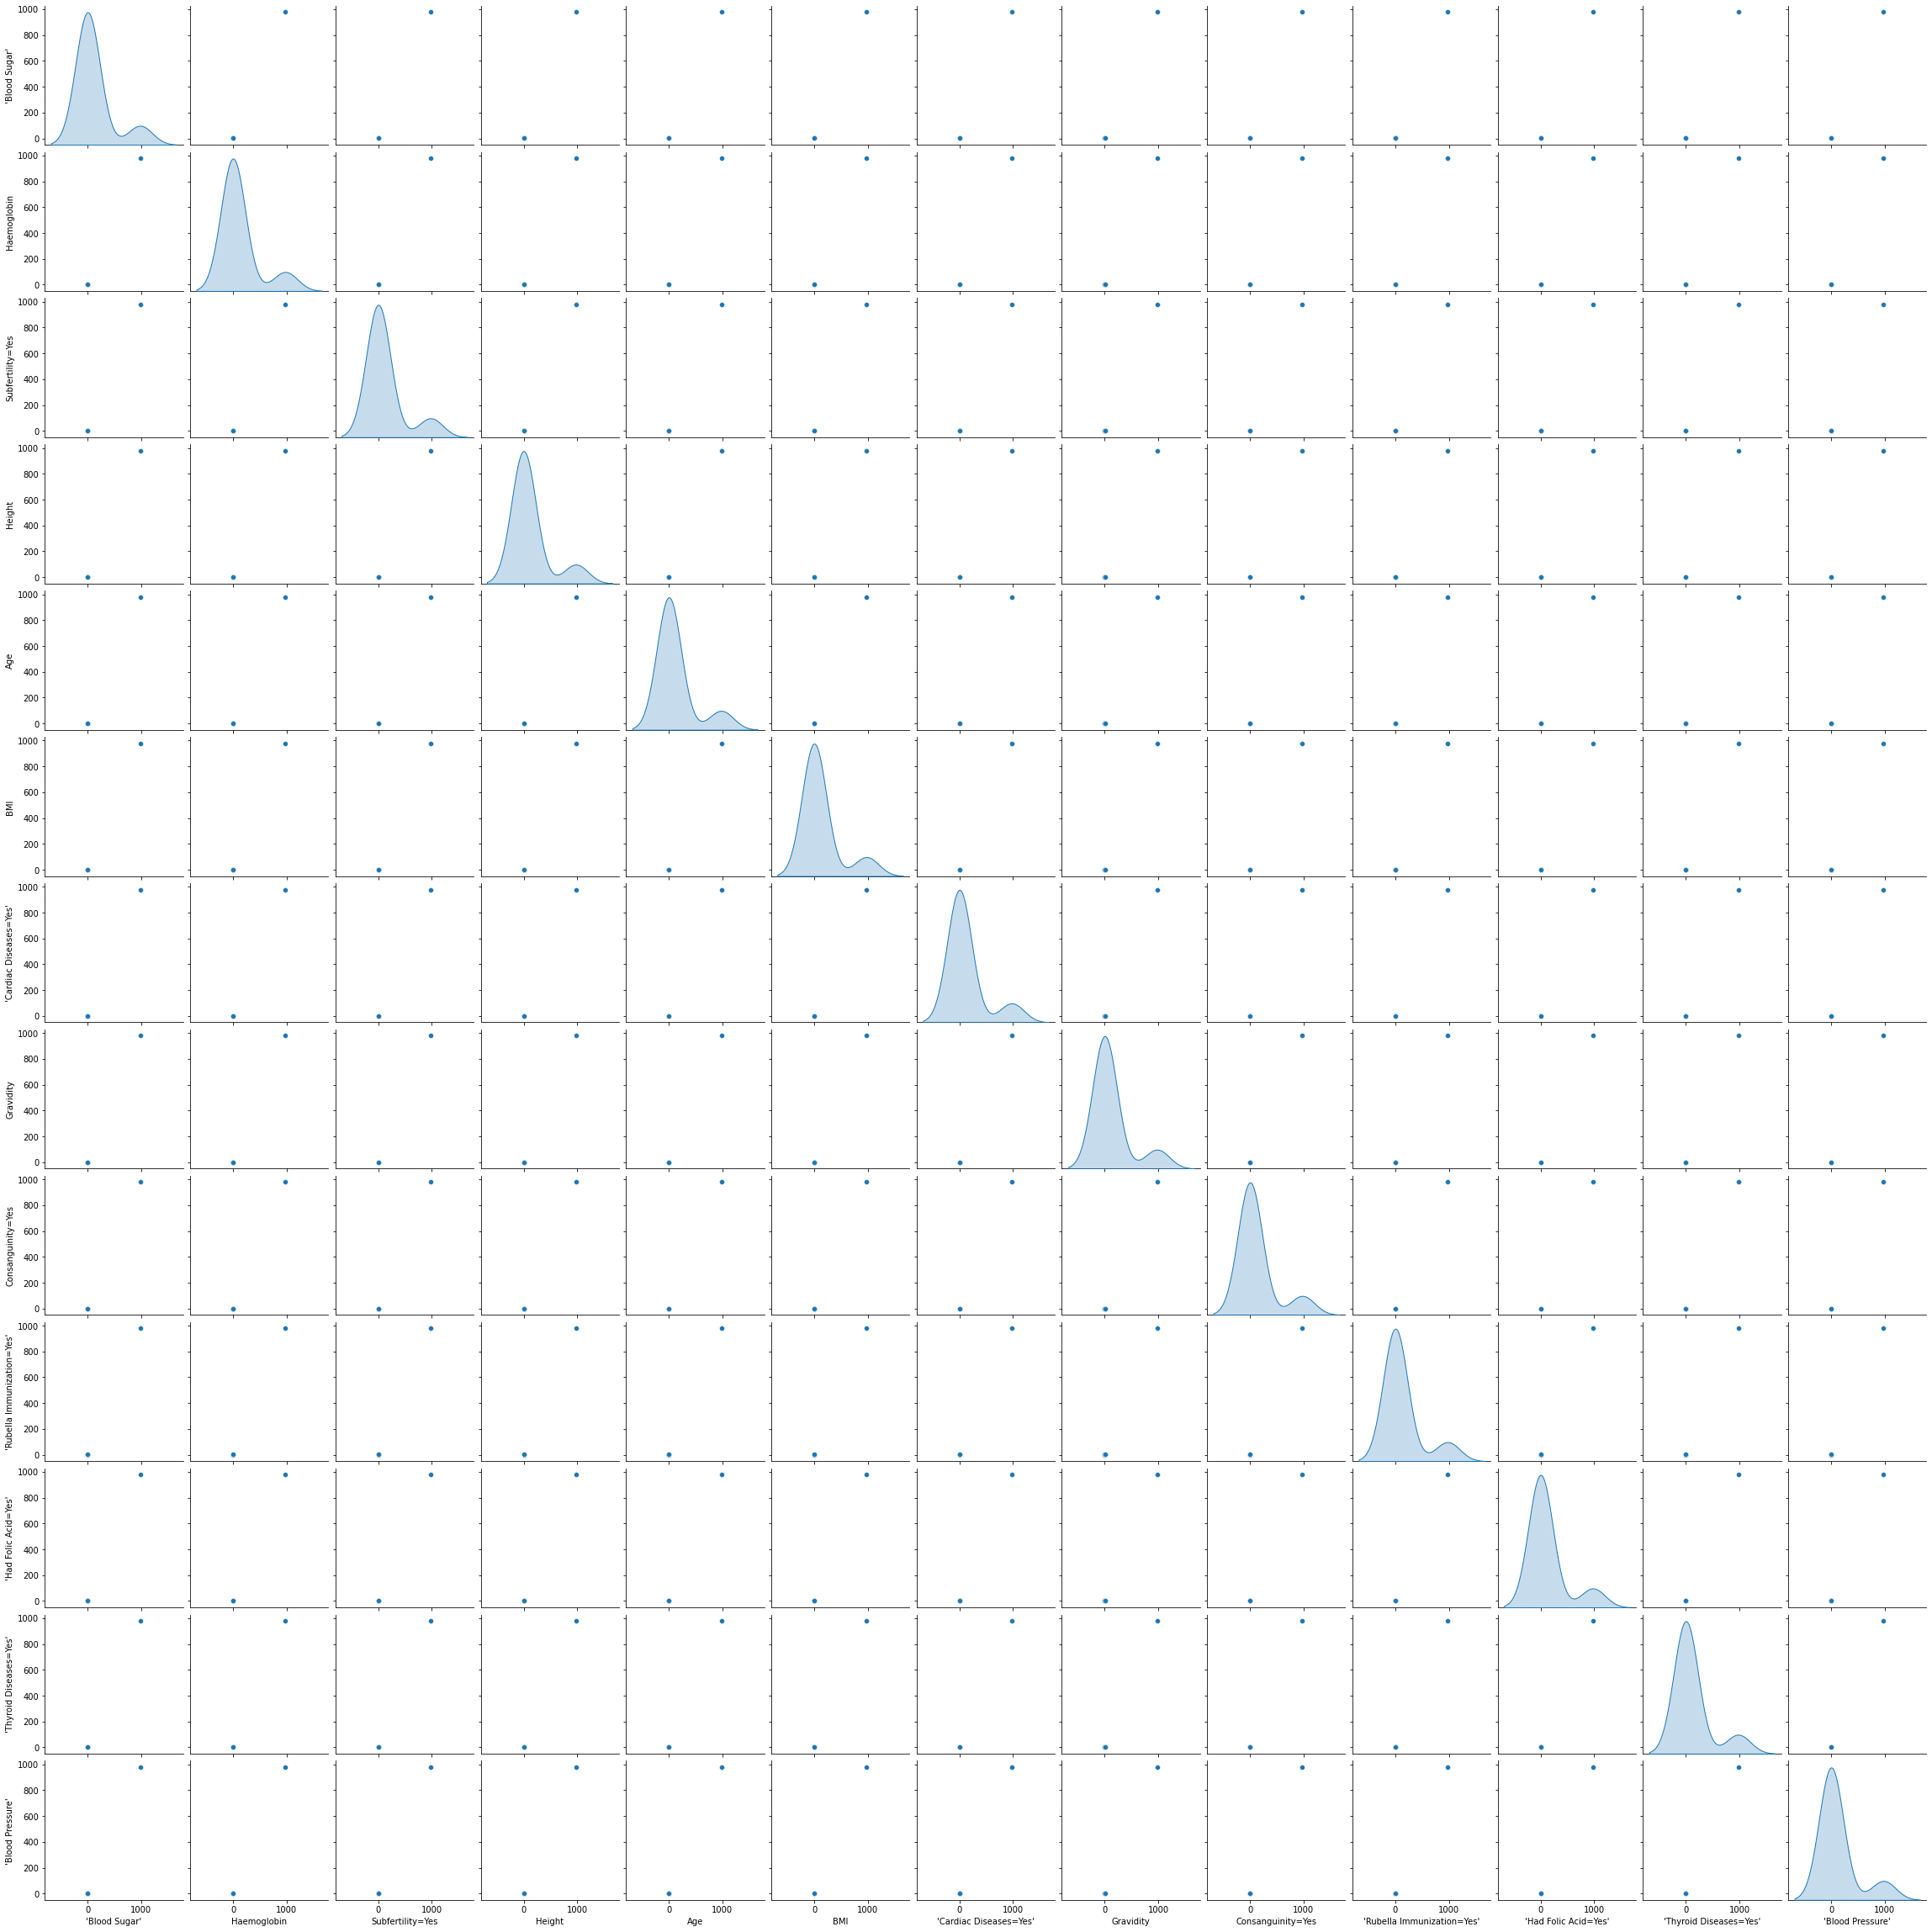

In [54]:
train_stats = train_dataset.describe()
train_stats.pop("Prediction")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [55]:
train_stats =train_dataset.describe()
train_stats.pop("Prediction")
train_stats =train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
'Blood Sugar',979.0,0.485004,0.142536,0.161616,0.383838,0.494949,0.545455,1.0
Haemoglobin,979.0,0.571278,0.141133,0.000000,0.486486,0.591225,0.675676,1.0
Subfertility=Yes,979.0,0.074566,0.262824,0.000000,0.000000,0.000000,0.000000,1.0
Height,979.0,0.519210,0.112736,0.212121,0.434343,0.515152,0.595960,1.0
Age,979.0,0.465366,0.177055,0.031250,0.343750,0.468750,0.593750,1.0
BMI,979.0,0.405951,0.137457,0.000000,0.311475,0.393443,0.490164,1.0
'Cardiac Diseases=Yes',979.0,0.002043,0.045175,0.000000,0.000000,0.000000,0.000000,1.0
Gravidity,979.0,0.179946,0.182899,0.000000,0.000000,0.166667,0.333333,1.0
Consanguinity=Yes,979.0,0.016343,0.126856,0.000000,0.000000,0.000000,0.000000,1.0
'Rubella Immunization=Yes',979.0,0.982635,0.130693,0.000000,1.000000,1.000000,1.000000,1.0


In [56]:
train_labels =train_dataset.pop('Prediction')
test_labels = test_dataset.pop('Prediction')
valid_labels = valid_dataset.pop('Prediction')

#Build a Neural Network Model

In [ ]:
def build_model2_three_hidden_layers():
  model = Sequential()
  model.add(Dense(32, input_shape =(train_dataset.shape[1],)))
  model.add(Dense(32, Activation('relu')))
  model.add(Dense(64, Activation('relu')))
  model.add(Dense(128, Activation('relu')))
  model.add(Dense(1))

  learning_rate =0.001
  optimizer= optimizers.SGD(learning_rate)
  model.compile(loss =tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model : ')
model2.summary()

# Training the model we built above

In [59]:
def build_model1_two_hidden_layers():
  model= Sequential()
  model.add(Dense(32, input_shape= (train_dataset.shape[1],)))
  model.add(Dense(1))
  learning_rate =0.00001
  optimizer= optimizers.SGD(learning_rate)
  model.compile(loss =tf.keras.losses.BinaryCrossentropy(from_logits=True),
  optimizer=optimizer, 
  metrics=['accuracy'])
   
  return model
EPOCHS =100
batch_size = 16

model= build_model1_two_hidden_layers()
print('Here is a summary of this model:')
model.summary()


with tf.device('/CPU:0'):
  history =model.fit(
      train_dataset,
      train_labels,
      batch_size = batch_size,
      epochs = EPOCHS,
      verbose=1,
      shuffle = True,
      steps_per_epoch = int(train_dataset.shape[0]/batch_size),
      validation_data =(valid_dataset,valid_labels),
  )

Here is a summary of this model:
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
61/61 [==============================] - 1s 5ms/step - loss: 0.6816 - accuracy: 0.6267 - val_loss: 0.6651 - val_accuracy: 0.6476
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.6385 - val_loss: 0.6650 - val_accuracy: 0.6476
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.6181 - val_loss: 0.6650 - val_accuracy: 0.6476
Epoch 4/100
61/61 [==============================] - 0s 2ms/s

In [60]:
print('Summary of thel results after each epoch ')
hist =pd.DataFrame(history.history)
hist['epoch'] =history.epoch
hist.tail()

Summary of thel results after each epoch 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.651313,0.658359,0.661485,0.647619,95
96,0.670039,0.638629,0.661448,0.647619,96
97,0.664700,0.638629,0.661416,0.647619,97
98,0.672860,0.629283,0.661376,0.647619,98
99,0.670565,0.637591,0.661342,0.647619,99


# See how the training went by plotting the loss/Accuracy across epochs

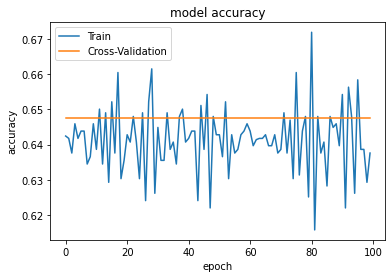

In [61]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc ='upper left')
plt.show()

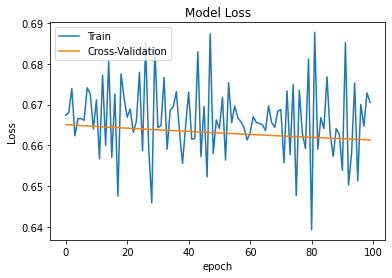

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc ='upper left')
plt.show()

In [66]:
print('Train Split')
loss, accuracy = model.evaluate(train_dataset, train_labels, verbose=1)

print("Accuracy  : {:5.2f}".format(accuracy))

Train Split
31/31 [==============================] - 0s 871us/step - loss: 0.6643 - accuracy: 0.6415
Accuracy  :  0.64


In [68]:
print('Evaluation Split: ')
loss , accuracy =model.evaluate(valid_dataset , valid_labels, verbose=2)

print("Accuracy :{:5.2f}", format(accuracy))

Evaluation Split: 
7/7 - 0s - loss: 0.6613 - accuracy: 0.6476
Accuracy :{:5.2f} 0.6476190686225891


In [70]:
print('Test Split')
loss, accuracy = model.evaluate(test_dataset, test_labels, verbose=2)

print("Accuracy : {:5.2f}". format(accuracy))

Test Split
7/7 - 0s - loss: 0.6298 - accuracy: 0.6762
Accuracy :  0.68


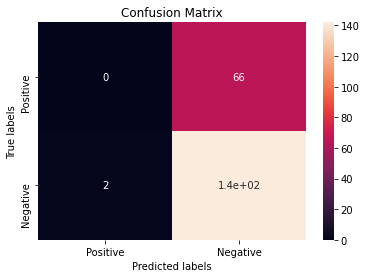

In [72]:
from sklearn.metrics import confusion_matrix

ax =plt.subplot()
predict_results = model.predict(test_dataset)

predict_results = (predict_results > 0.5)
cm = confusion_matrix (test_labels, predict_results)

sns.heatmap(cm, annot =True, ax= ax);


ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);